In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# import the data

users_data = pd.read_pickle("../data/users_data_final.pkl")

# preview the data 
users_data.head(n = 3)

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile


In [5]:
# check the shape of data

users_data.shape

(45209, 19)

In [7]:
# number of unique users

print("# of number of unique users:", len(users_data.user_id.unique()))

# of number of unique users: 45209


In [8]:
# structure of the data

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [9]:
# summary statistics

users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
users_data.describe(datetime_is_numeric = True)

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous,date_joined
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000,45179
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349,1999-06-14 21:54:38.558622336
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,1988-01-01 00:00:00
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000,1993-09-18 00:00:00
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000,1999-06-11 00:00:00
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000,2005-03-18 00:00:00
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000,2010-11-30 00:00:00
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489,NaN


In [13]:
# distribution of a non numerical feature

users_data.job.value_counts(dropna = False)

blue-collar      9731
management       9457
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

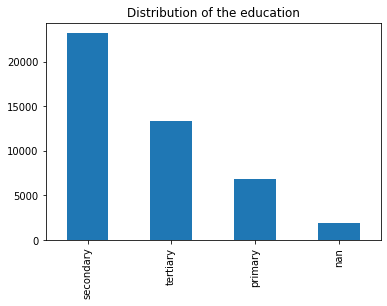

In [26]:
# visualise the data

var = "education"

users_data[var].value_counts(dropna=False).plot(kind = "bar")
plt.title(f"Distribution of the {var}")
plt.show()


In [27]:
# identify features with low variance

users_data.std()

<ipython-input-27-46197dbb2a92>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  users_data.std()


number_transactions                        3.814329
total_amount_usd                        3063.412688
age                                       10.618653
default                                    0.133052
housing                                     0.49688
loan                                       0.366827
duration                                 257.525446
campaign                                   3.098076
pdays                                    100.130586
previous                                   2.303489
term_deposit                               0.321412
date_joined            2420 days 10:04:20.364896480
dtype: object

In [29]:
# look at the distribution of default

users_data.default.value_counts(normalize = True)

False    0.981973
True     0.018027
Name: default, dtype: float64

In [34]:
# look at correlations between the data

corr_matrix = users_data.corr()
corr_matrix

# did not identify any features with high correlations, no feature engineering required

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


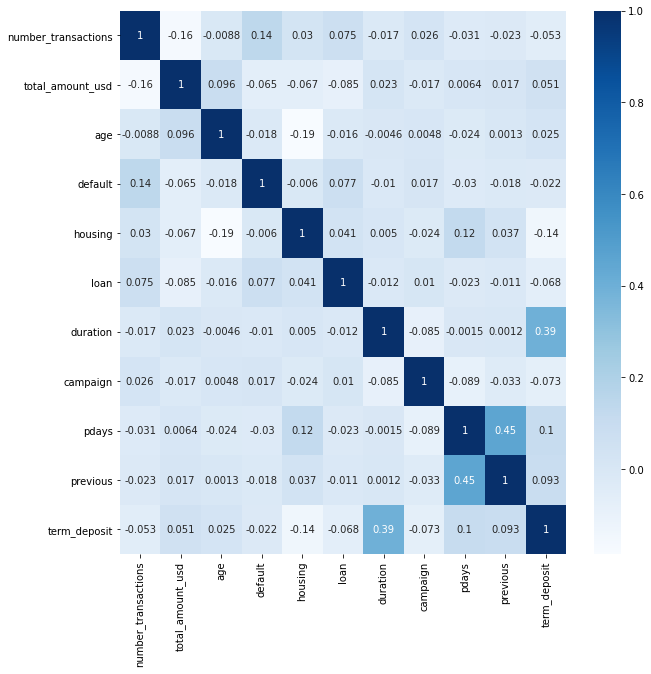

In [37]:
fig = plt.figure(figsize = (10, 10))

sns.heatmap(corr_matrix,
           cmap = "Blues",
           annot = True)
plt.show()

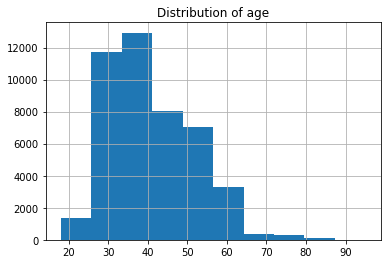

In [39]:
# explore the distribution of numerical data

users_data.age.hist()
plt.title("Distribution of age")
plt.show()

/Users/shaq/.pyenv/versions/3.8.10/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


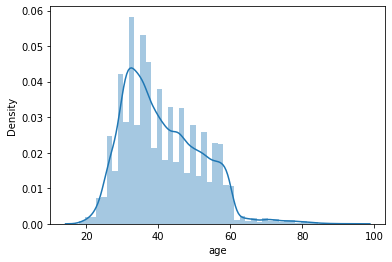

In [41]:
sns.distplot(users_data.age);

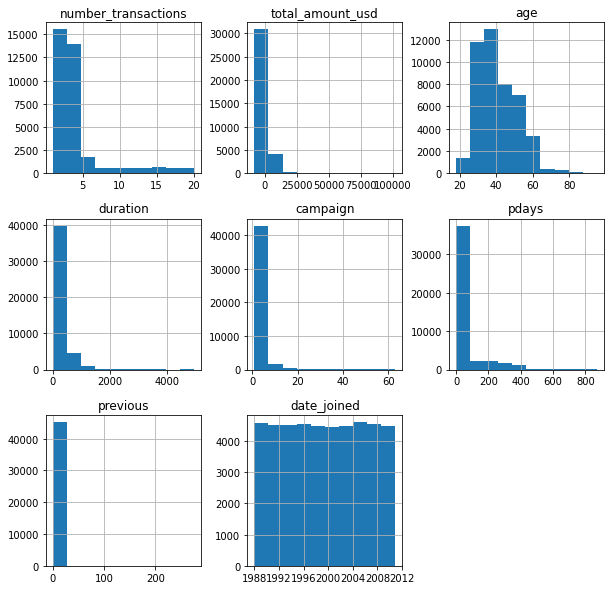

In [43]:
users_data.hist(figsize = (10,10));

- All the features are skewed - We noticed one feature with low variance, default that we need to drop

In [44]:
# distribution of age

users_data.age.describe()

count    45209.000000
mean        40.935853
std         10.618653
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [45]:
# mode of age

users_data.age.mode()

# since median, mean and mode are not equal this is not normally distributed and may require transformation

0    32
dtype: int64

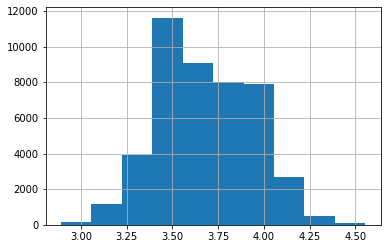

In [48]:
np.log(users_data.age).hist()
plt.title("Applying Logarithmic Transformation of Age");

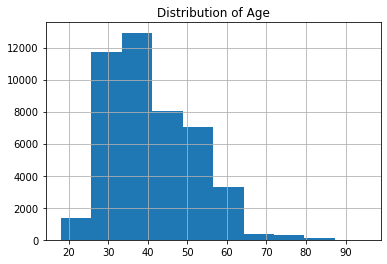

In [50]:
users_data.age.hist()
plt.title("Distribution of Age");

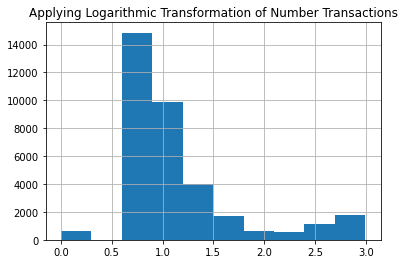

In [51]:
np.log(users_data.number_transactions).hist()
plt.title("Applying Logarithmic Transformation of Number Transactions");

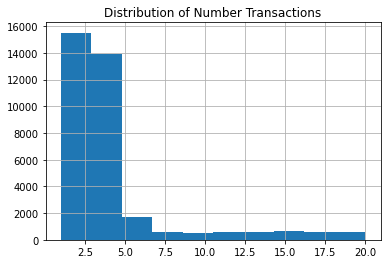

In [53]:
users_data.number_transactions.hist()
plt.title("Distribution of Number Transactions");

In [54]:
# 

users_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

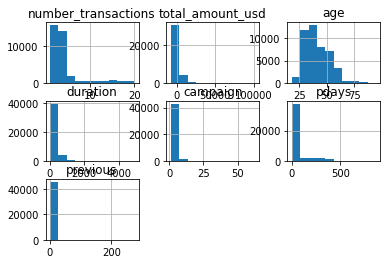

In [58]:
# how many categories does each feature have, with data type object?

users_data.select_dtypes(['int64', 'float64']).hist();

In [62]:
categorical_columns = list(users_data.select_dtypes(['object']).columns)
categorical_columns

['user_id', 'job', 'marital', 'education', 'contact', 'poutcome', 'device']

In [74]:
cat_df = []

for c in categorical_columns:
    cat_df.append({"categorical_feature_name":c,
                    "count": len(users_data[c].unique())
                  })
    
pd.DataFrame(cat_df)

,categorical_feature_name,count
0,user_id,45209
1,job,12
2,marital,3
3,education,4
4,contact,3
5,poutcome,4
6,device,4


In [137]:
len(users_data.job.unique())

12

In [78]:
def identify_number_categories(df):
    """
    This definition can be used to identify the number of categories of every categorical feature 
    
    @param df DataFrame 
    
    @return a DataFrame with the categorical features and number of categories"""

    categorical_columns = list(df.select_dtypes(['object']).columns)

    cat_df = []

    for c in categorical_columns:
        cat_df.append({"categorical_feature": c,
                       "number_categories": len(df[c].value_counts(dropna = False))
                    })
        
    return pd.DataFrame(cat_df).sort_values(by = "number_categories", ascending = False)

In [79]:
# Data Frame that identifies features with data types object and the number of categories

identify_number_categories(users_data)

# we need to drop the feature user_id when we do our feature selection

,categorical_feature,number_categories
0,user_id,45209
1,job,12
3,education,4
5,poutcome,4
6,device,4
2,marital,3
4,contact,3


In [80]:
# identify missing data

users_data.isnull().sum()


user_id                    0
number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [81]:
users_data.isnull().mean()

user_id                0.000000
number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

In [82]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df


In [84]:
missing_value_df = identify_missing_data(users_data)
missing_value_df[missing_value_df["percent_missing"] > 0]

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object
7,date_joined,0.07,datetime64[ns]


### Feature Engineering

In [120]:
# identify rows where date_joined has missing data, and remove these rows

# data frame where date joined is missing
users_data[users_data.date_joined.isnull()]

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
1832,a8efc367-e7bc-4ddf-a075-ab6a850c5be1,2.0,10.0,40,blue-collar,married,secondary,False,True,False,None,1692,2,-1,0,None,True,NaT,desktop
1970,e287579c-0eb5-4da0-a697-a92e6a024c47,6.0,391.0,34,admin.,single,secondary,False,True,False,None,192,2,-1,0,None,False,NaT,mobile
8033,9e6d7f37-fec1-4967-9281-d37eb69fc211,4.0,691.0,34,technician,married,tertiary,False,True,True,None,70,1,-1,0,None,False,NaT,mobile
11292,e380ff78-00d5-4f4d-93a3-db991ff0ca3b,3.0,2769.0,41,services,divorced,secondary,False,True,False,None,96,3,-1,0,None,False,NaT,mobile
12439,d64a3876-1dc0-480e-b13e-c4b89639b6d2,5.0,0.0,57,retired,married,secondary,False,False,True,None,104,2,-1,0,None,False,NaT,mobile
13006,2673ec0e-5df6-416f-9eda-e39cb50ca03c,2.0,473.0,32,services,single,secondary,False,True,False,cellular,624,5,-1,0,None,False,NaT,mobile
13826,a0e4abc2-6451-4a97-a669-45307de8059d,2.0,29.0,57,retired,married,tertiary,False,False,False,telephone,532,2,-1,0,None,False,NaT,mobile
15175,1101e360-4872-44a9-a3ac-38afa2f73581,NaN,NaN,33,self-employed,divorced,secondary,False,True,False,cellular,1584,2,-1,0,None,True,NaT,mobile
15290,a63e7d7d-00ba-4751-be20-440576efaac3,2.0,976.0,42,admin.,married,secondary,False,True,False,cellular,69,7,-1,0,None,False,NaT,mobile
17032,e5b0bc16-b7fc-43a8-9d4f-90827fbe8f1f,NaN,NaN,51,unemployed,married,primary,False,True,False,cellular,2015,1,-1,0,None,True,NaT,mobile


In [121]:
# check the number of rows we need to drop

print("# of rows where date joined is missing:", 
      users_data[users_data.date_joined.isnull()].shape[0])

# of rows where date joined is missing: 30


In [122]:
# drop rows where date joined is missing
# the tilda means identify rows where date joined is not null 

users_data_cleaned = users_data[~users_data.date_joined.isnull()] # the tilda means.... 
users_data_cleaned.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [123]:
missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0] 

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.11,float64
3,number_transactions,22.11,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object


In [124]:
# drop features where we have more than 60% missing data

users_data_cleaned = users_data_cleaned.drop(["poutcome"], axis = 1)


In [125]:
missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0] 

,feature,percent_missing,data_type
0,contact,28.80,object
1,total_amount_usd,22.11,float64
2,number_transactions,22.11,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object


In [126]:
users_data_cleaned.contact.value_counts(dropna = False)

cellular     29262
NaN          13013
telephone     2904
Name: contact, dtype: int64

In [127]:
# replace nas in contact with "not contacted"

users_data_cleaned.contact.fillna("not_contacted", inplace = True)

In [128]:
missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0] 

,feature,percent_missing,data_type
0,total_amount_usd,22.11,float64
1,number_transactions,22.11,float64
2,education,4.11,object
3,job,0.64,object
4,device,0.21,object


In [129]:
# replace the nas in total_amount_usd to the mean of total_amount_usd

users_data_cleaned.total_amount_usd.fillna(users_data_cleaned.total_amount_usd.mean(),
                                           inplace = True)

In [130]:
missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0] 

,feature,percent_missing,data_type
0,number_transactions,22.11,float64
1,education,4.11,object
2,job,0.64,object
3,device,0.21,object


In [131]:
# replace the nas in number_transactions to the mean of number_transactions

users_data_cleaned.number_transactions.fillna(users_data_cleaned.number_transactions.mean(),
                                           inplace = True)

In [132]:
missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0] 

,feature,percent_missing,data_type
0,education,4.11,object
1,job,0.64,object
2,device,0.21,object


In [133]:
# replace all remaining features with data types object with Unknown

users_data_cleaned.education.fillna("Unknown", inplace = True)
users_data_cleaned.job.fillna("Unknown", inplace = True)
users_data_cleaned.device.fillna("Unknown", inplace = True)

In [134]:
missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0] 

,feature,percent_missing,data_type
